<a href="https://colab.research.google.com/github/KuroiYoshiko/Traffic-Light-Detection/blob/main/Praca_Magisterska_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Uczenie modelu**

### **1.1. Przygotowanie danych**

Importy

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from google.colab import drive

!pip install ultralytics
!pip install -U torch sahi
from ultralytics import YOLO

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image
import os
os.getcwd()

Zamontowanie Dysku Google

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **1.2. Uczenie modelu**

In [ ]:
# Load a model
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data="/content/drive/MyDrive/Lisa_dataset/data.yaml", epochs=100)  # train the model


In [ ]:
model = YOLO("/content/drive/MyDrive/best-nano.pt")
image = "/content/drive/MyDrive/image2.JPG"
results = model.predict(image, save=True, save_txt=True)  # predict on an image


image 1/1 /content/drive/MyDrive/image2.JPG: 448x640 1 go, 107.4ms
Speed: 0.7ms preprocess, 107.4ms inference, 47.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [ ]:
print(results[0])

In [ ]:
results = model.val()  # evaluate model performance on the validation set
#success = model.export(format="onnx")  # export the model to ONNX format

### **Detekcja**

In [ ]:
#!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/zidane.jpg'
#!yolo val model="/content/runs/detect/train/weights/best.pt" data=coco128.yaml

In [ ]:
model = YOLO("/content/drive/MyDrive/yolov8m_800sz.pt")
model_path_yolov8 = "/content/drive/MyDrive/yolov8m_800sz.pt"
image1 = "/content/drive/MyDrive/lisa-testowe/daySequence1--00007.jpg"
image2 = "/content/drive/MyDrive/lisa-testowe/daySequence1--00165.jpg"
image3 = "/content/drive/MyDrive/lisa-testowe/daySequence1--00487.jpg"
image4 = "/content/drive/MyDrive/lisa-testowe/daySequence1--02787.jpg"
image5 = "/content/drive/MyDrive/lisa-testowe/daySequence2--04781.jpg"
image6 = "/content/drive/MyDrive/lisa-testowe/daySequence2--06596.jpg"

In [ ]:
!pip install moviepy
from moviepy.editor import *

In [ ]:
import zipfile

folder_to_zip = '/content/ground_truth'  # Podaj ścieżkę do folderu do spakowania
output_zip = '/content/sekw_ground_truth.zip'  # Podaj ścieżkę do pliku wyjściowego ZIP

with zipfile.ZipFile(output_zip, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(folder_to_zip):
        for file in files:
            file_path = os.path.join(root, file)
            zipf.write(file_path, os.path.relpath(file_path, folder_to_zip))

In [ ]:
image_folder = "/content/drive/MyDrive/Lisa_dataset/lisa-day/test/images"  # Podaj ścieżkę do folderu z obrazami
video_name = "/content/drive/MyDrive/sekwencja.mp4"  # Podaj ścieżkę do pliku wyjściowego wideo

images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]  # Wybierz tylko pliki z rozszerzeniem .jpg

# Sortuj pliki obrazów według ich nazw (opcjonalne)
images.sort()

# Ogranicz listę obrazów do 200 pierwszych
images = images[2660:2900]


video_clips = []
for img in images:
    image_path = os.path.join(image_folder, img)
    #detection = model.predict(image_path)
    model.predict(image_path, save=True, imgsz=800, conf=0.5)
    #image_clip = ImageClip(image_path, duration=0.05)
    #video_clips.append(image_clip)

# Tworzenie sekwencji wideo
#final_clip = concatenate_videoclips(video_clips, method="compose")

# Zapis sekwencji wideo
#final_clip.write_videofile(video_name, codec='mpeg4', fps=24)

In [ ]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov8',
    model_path=model_path_yolov8,
    confidence_threshold=0.3,
    device="cpu", # or 'cuda:0'
)

Czas wykonywania: 0.11495828628540039 sekundy


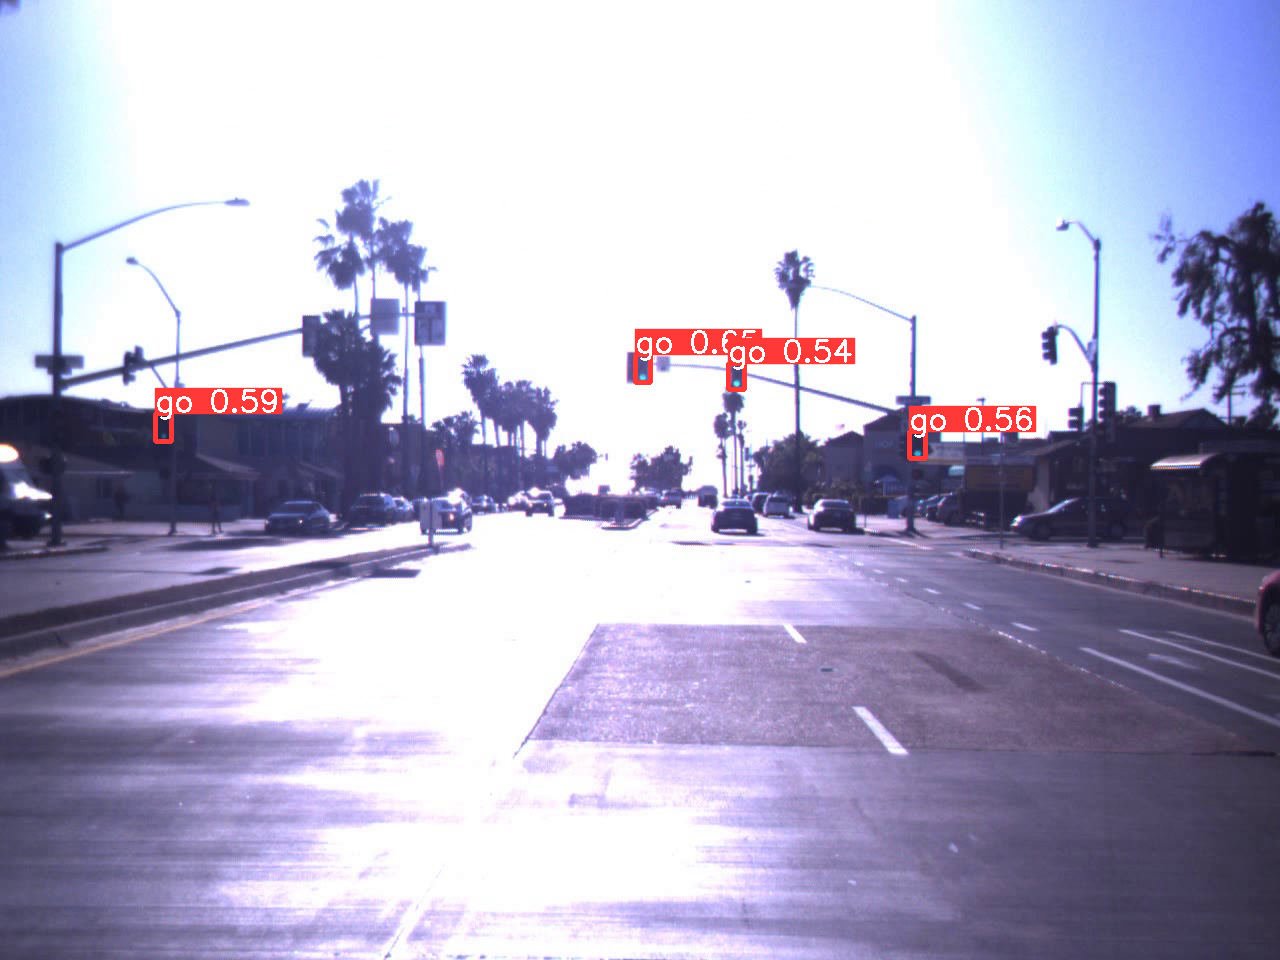

In [ ]:
import time
from IPython.display import Image

start_time = time.time()
result = get_prediction(image4, detection_model)
elapsed_time = time.time() - start_time
print(f"Czas wykonywania: {elapsed_time} sekundy")


result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
image_folder = "/content/drive/MyDrive/Lisa_dataset/lisa-day/test/images"  # Podaj ścieżkę do folderu z obrazami
images = [img for img in os.listdir(image_folder) if img.endswith(".jpg")]  # Wybierz tylko pliki z rozszerzeniem .jpg
images.sort()
images = images[2660:2900]
iteration = 0

for img in images:
    iteration = iteration+1
    image_path = os.path.join(image_folder, img)
    #model.predict(image_path, save=True, imgsz=800, conf=0.5)
    file_nazwa = "pred_"+ str(iteration) + ".jpg"
    result = get_sliced_prediction(image_path,
                                   detection_model,
                                   slice_height = 512,
                                   slice_width = 512,
                                   overlap_height_ratio = 0.2,
                                   overlap_width_ratio = 0.2)
    result.export_visuals(export_dir="/content/SAHI_detect/yolov8m_800sz/", file_name=file_nazwa)


Performing prediction on 9 number of slices.
Czas wykonywania: 0.7964878082275391 sekundy


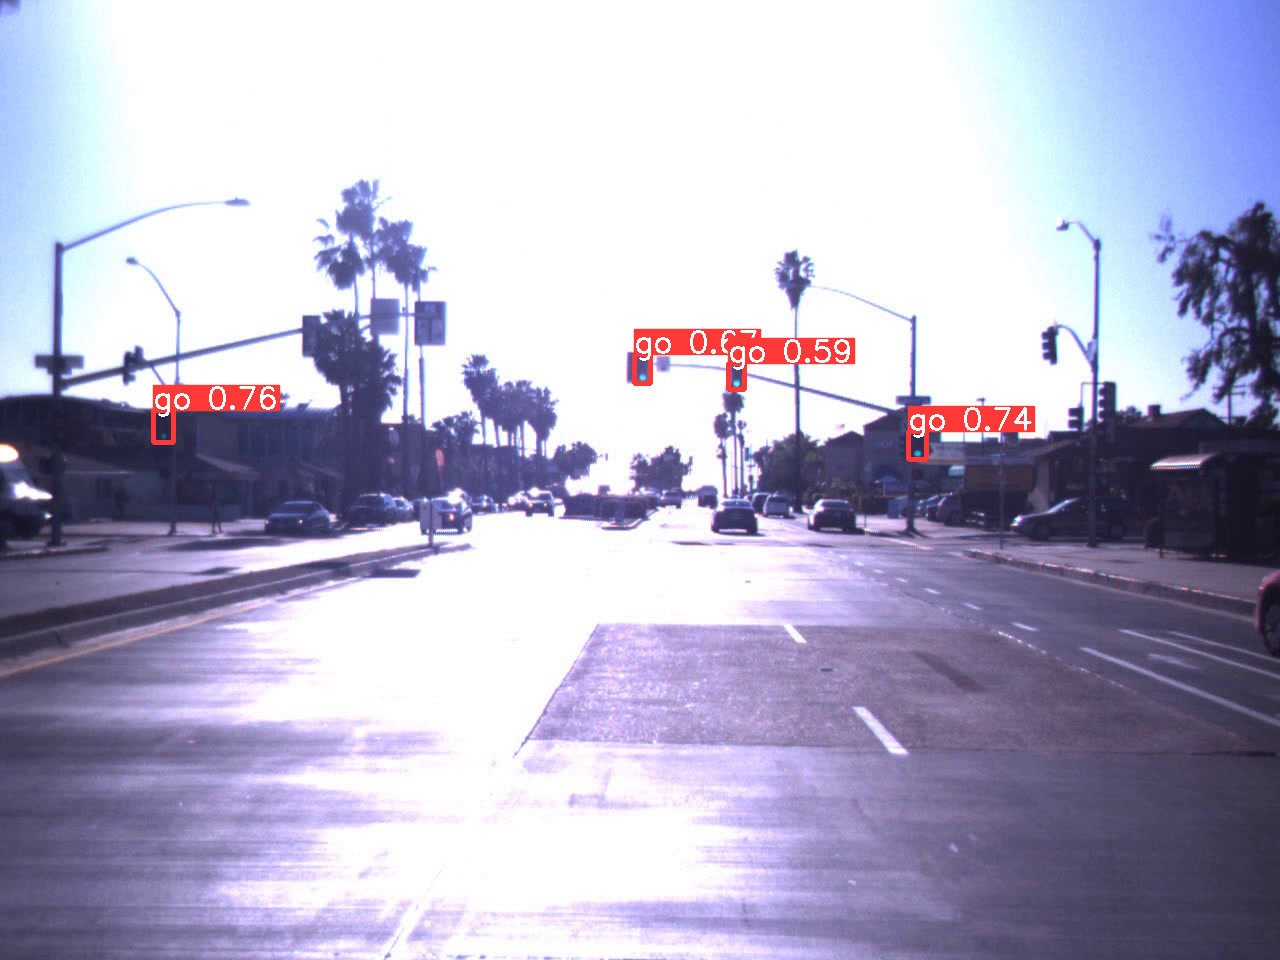

In [ ]:
start_time = time.time()
result = get_sliced_prediction(
    image4,
    detection_model,
    slice_height = 512,
    slice_width = 512,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

elapsed_time = time.time() - start_time
print(f"Czas wykonywania: {elapsed_time} sekundy")

result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
start_time = time.time()
result = get_sliced_prediction(
    "/content/drive/MyDrive/lisa-testowe/daySequence2--04602.jpg",
    detection_model,
    slice_height = 758,
    slice_width = 750,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

elapsed_time = time.time() - start_time
print(f"Czas wykonywania: {elapsed_time} sekundy")

result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
start_time = time.time()
result = get_sliced_prediction(
    "/content/drive/MyDrive/lisa-testowe/daySequence2--04602.jpg",
    detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2
)

elapsed_time = time.time() - start_time
print(f"Czas wykonywania: {elapsed_time} sekundy")

result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving val-annotations-day.csv to val-annotations-day.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

image_folder = "/content/drive/MyDrive/Lisa_dataset/lisa-day/test/images/"
labels_file = "/content/val-annotations-day.csv"

labels = pd.read_csv("val-annotations-day.csv", index_col=False)
labels = labels[labels['Filename'].str.contains("daySequence1--0")].dropna()

start_filename = f"daySequence1--02660"
end_filename = f"daySequence1--02899"

selected_labels = labels[
    (labels['Filename'] >= start_filename) &
    (labels['Filename'] <= end_filename)
]
selected_labels

In [ ]:
import os
import cv2
from PIL import Image

output_folder = "/content/ground_truth"

for _, group in selected_labels.groupby("Filename"):
    # Pobierz nazwę pliku obrazu
    filename = group["Filename"].iloc[0]
    # Skonstruuj pełną ścieżkę do obrazu
    image_path = os.path.join(image_folder, filename)

    # Wczytaj obraz przy użyciu biblioteki PIL
    image = Image.open(image_path)

    # Konwertuj obraz z PIL na tablicę NumPy
    image_np = np.array(image)

    # Pobierz rozmiary obrazu
    image_width, image_height = image.size

    # Iteruj przez każdy bounding box w grupie
    for _, row in group.iterrows():
        # Pobierz wartości bounding boxa
        x1 = int(row["Upper left corner X"])
        y1 = int(row["Upper left corner Y"])
        x2 = int(row["Lower right corner X"])
        y2 = int(row["Lower right corner Y"])

        # Narysuj bounding box na obrazie
        cv2.rectangle(image_np, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Konwertuj z powrotem na obiekt PIL
    image_with_boxes = Image.fromarray(image_np)

    # Zapisz obraz z bounding boxami do folderu wyjściowego
    output_filename = f"boxed_{filename}"
    output_path = os.path.join(output_folder, output_filename)
    image_with_boxes.save(output_path)

### **Import modelu z Dysku Google**

In [ ]:
if os.name =='posix':
    !cp 'drive/MyDrive/Praca_Dyplomowa/models.tar.gz' 'Tensorflow/workspace/models'
if os.name == 'nt':
    !copy 'drive/MyDrive/Praca_Dyplomowa/models.tar.gz' 'Tensorflow/workspace/models'

In [ ]:
MODEL_FILES = os.path.join(paths['MODEL_PATH'], 'models.tar.gz')
if os.path.exists(MODEL_FILES):
  !tar -zxvf {MODEL_FILES}

### **Export modelu**

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}